In [148]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [149]:
# Load the data

df = pd.read_csv("/Users/mubeen/Library/CloudStorage/OneDrive-TheUniversityofHongKong/Year5/Chengdu/CD80_dataset/Insurance Claims Data/insurance_claims.csv", sep=",")
df.replace("?", np.nan, inplace=True)
print(df)

     months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \

In [150]:
df.describe()
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [151]:
df.columns

# Drop the rows with if "fraud_reported" col is Y
df = df[df["fraud_reported"] == "N"]

In [152]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [153]:
# Pick features and target variable, drop the columns that are not needed

X = df.drop(["policy_number", "policy_bind_date", "policy_state", "policy_deductable", "umbrella_limit", "insured_zip", "insured_education_level","insured_occupation", "insured_hobbies", "insured_relationship", "capital-gains","capital-loss","incident_date", "incident_type","incident_severity","authorities_contacted","incident_city","incident_location","incident_hour_of_the_day","property_damage","total_claim_amount","injury_claim","property_claim","fraud_reported","_c39","policy_annual_premium","policy_csl","incident_state","vehicle_claim"], axis=1)
Y = df["vehicle_claim"]

In [154]:
X

,months_as_customer,age,insured_sex,collision_type,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year
2,134,29,FEMALE,Rear Collision,3,2,3,NO,Dodge,RAM,2007
4,228,44,MALE,NaN,1,0,1,NO,Accura,RSX,2009
6,137,34,MALE,Front Collision,3,0,0,NaN,Nissan,Pathfinder,2012
7,165,37,MALE,Front Collision,3,2,2,YES,Audi,A5,2015
8,27,33,FEMALE,Front Collision,1,1,1,YES,Toyota,Camry,2012
...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,FEMALE,Front Collision,1,0,1,NaN,Honda,Accord,2006
996,285,41,FEMALE,Rear Collision,1,2,3,NaN,Volkswagen,Passat,2015
997,130,34,FEMALE,Side Collision,3,2,3,YES,Suburu,Impreza,1996
998,458,62,MALE,Rear Collision,1,0,1,YES,Audi,A5,1998


In [155]:
Y

2      23100
4       4550
6      50050
7      32830
8      22160
       ...  
995    61040
996    72320
997    52500
998    36540
999     3680
Name: vehicle_claim, Length: 753, dtype: int64

In [156]:
# if insured_sex column has male change to 1 and female to 0"
X["insured_sex"]
X["insured_sex"] = X["insured_sex"].apply(lambda x: 1 if str(x).strip() == "MALE" else 0)

# If police_report_available column has yes change to 1 and no to 0
X["police_report_available"] = X["police_report_available"].apply(lambda x: 1 if str(x).strip() == "YES" else 0)

In [157]:
X

,months_as_customer,age,insured_sex,collision_type,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year
2,134,29,0,Rear Collision,3,2,3,0,Dodge,RAM,2007
4,228,44,1,NaN,1,0,1,0,Accura,RSX,2009
6,137,34,1,Front Collision,3,0,0,0,Nissan,Pathfinder,2012
7,165,37,1,Front Collision,3,2,2,1,Audi,A5,2015
8,27,33,0,Front Collision,1,1,1,1,Toyota,Camry,2012
...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,Front Collision,1,0,1,0,Honda,Accord,2006
996,285,41,0,Rear Collision,1,2,3,0,Volkswagen,Passat,2015
997,130,34,0,Side Collision,3,2,3,1,Suburu,Impreza,1996
998,458,62,1,Rear Collision,1,0,1,1,Audi,A5,1998


In [158]:

# X["collision_type"] = X["collision_type"].apply(lambda x: 0 if str(x).strip() == "Rear Collision" else (1 if str(x).strip() == "?" else (2 if str(x).strip() == "Front Collision" else 3)))
# X["collision_type"]

for idx, elem in enumerate(X["collision_type"]):
    elem = str(elem).strip()
    if elem == "Rear Collision":
        X["collision_type"].iloc[idx] = 0
    elif elem == "Front Collision":
        X["collision_type"].iloc[idx] = 1
    else:
        X["collision_type"].iloc[idx] = 2

X["collision_type"].dtype


/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_58461/2245834.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X["collision_type"].iloc[idx] = 0
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_58461/2245834.py:7: Set

dtype('O')

In [159]:
unique_autos = X['auto_make'].unique()
print(len(unique_autos), unique_autos)
for idx, elem in enumerate(X["auto_make"]):
    elem = str(elem).strip()
    for i, auto in enumerate(unique_autos):
        if elem == auto:
            X["auto_make"].iloc[idx] = i

unique_models = X['auto_model'].unique()
print(len(unique_models), unique_models)
for idx, elem in enumerate(X["auto_model"]):
    elem = str(elem).strip()
    for i, model in enumerate(unique_models):
        if elem == model:
            X["auto_model"].iloc[idx] = i

X["auto_year"] = X["auto_year"].apply(lambda x: x % 100)

X

14 ['Dodge' 'Accura' 'Nissan' 'Audi' 'Toyota' 'Saab' 'Ford' 'Suburu' 'BMW'
 'Jeep' 'Mercedes' 'Honda' 'Volkswagen' 'Chevrolet']
39 ['RAM' 'RSX' 'Pathfinder' 'A5' 'Camry' '92x' 'F150' 'A3' '95' 'Highlander'
 'Maxima' 'Legacy' 'TL' 'Impreza' 'Escape' 'Neon' 'Corolla' '3 Series'
 'Wrangler' 'M5' 'E400' 'MDX' 'Civic' 'Passat' 'C300' 'Forrestor'
 'Silverado' 'CRV' '93' 'Accord' 'X6' 'Malibu' 'Fusion' 'Jetta' 'X5'
 'ML350' 'Tahoe' 'Grand Cherokee' 'Ultima']


/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_58461/890188483.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X["auto_make"].iloc[idx] = i
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_58461/890188483.py:7: Sett

,months_as_customer,age,insured_sex,collision_type,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year
2,134,29,0,0,3,2,3,0,0,0,7
4,228,44,1,2,1,0,1,0,1,1,9
6,137,34,1,1,3,0,0,0,2,2,12
7,165,37,1,1,3,2,2,1,3,3,15
8,27,33,0,1,1,1,1,1,4,4,12
...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,1,1,0,1,0,11,29,6
996,285,41,0,0,1,2,3,0,12,23,15
997,130,34,0,2,3,2,3,1,7,13,96
998,458,62,1,0,1,0,1,1,3,3,98


In [160]:
Y.isnull().sum()

0

In [161]:
X.to_csv("X_label.csv", index=False)
Y.to_csv("Y_label.csv", index=False)

In [162]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

y_pred

array([37039.46882058, 31423.7261526 , 42500.22308945, 34854.39843992,
       47011.67691474, 28655.74999757, 42227.48238311, 35139.13901386,
       30189.59306973, 21700.81371291, 38892.62352195, 22981.15399203,
       35075.08077966, 40309.22032655, 29303.68641298, 22692.8527531 ,
       38165.97637648, 28225.53324508, 47346.32541028, 51067.48330034,
       28261.52056849, 23898.39165788, 27944.8011238 , 37707.92175156,
       38302.02992667, 36065.62925527, 35329.36573825, 21978.98418815,
       39748.03830588, 26391.75031672, 26026.31574417, 29325.44460881,
       40131.79613532, 52635.69675086, 36871.40802176, 22249.92704516,
       27040.57227477, 38250.25889814, 24097.42372949, 25198.67351781,
       43175.11653815, 29146.38782079, 23989.93379924, 38194.77347584,
       27158.05023442, 37415.36151023, 24793.53280389, 51491.29376547,
       28457.53011684, 34649.08607954, 41869.56847117, 33874.63913077,
       30160.34184046, 43395.59067903, 52138.04707486, 41576.52454304,
      

In [163]:
X_test.shape

(151, 11)

In [164]:
y_test.shape

(151,)

ValueError: x and y must be the same size

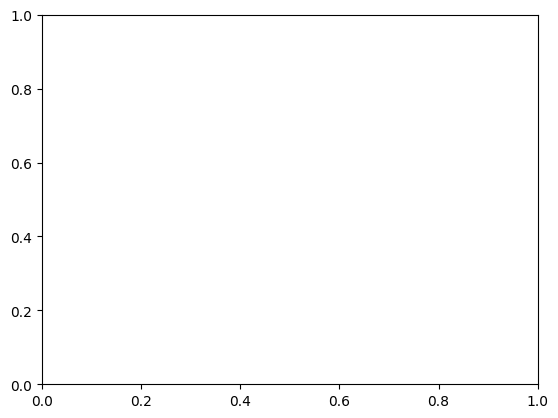

In [165]:
# Plotting
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Vehicle Claim')
plt.legend()
plt.show()


In [142]:
# Do linear regression on the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

Y_pred = lin_reg.predict(X_test)

print("Linear Regression")
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)
print("Mean squared error: ", np.mean((Y_pred - Y_test) ** 2))
print("Variance score: ", lin_reg.score(X_test, Y_test))


Linear Regression
Coefficients:  [-4.69784954e+00  1.55766982e+02 -9.44031025e+02 -8.48176283e+03
  5.16995009e+03  1.72973718e+02 -2.35329956e+02  2.95802818e+03
 -4.00220991e+01 -3.73103725e+01  1.77478277e+01]
Intercept:  32191.051353423478
Mean squared error:  287483236.9452493
Variance score:  0.216688857815713


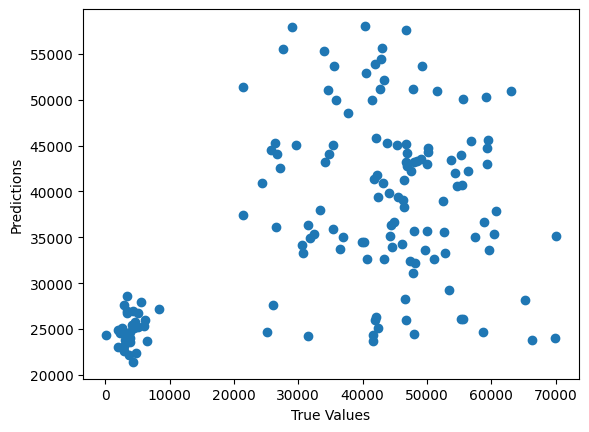

In [146]:
# plot 
plt.scatter
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

# # Ridge regression
# ridge = Ridge(alpha=0.1)
# ridge.fit(X_train, Y_train)

# Y_pred = ridge.predict(X_test)

# print("Ridge Regression")
# print("Coefficients: ", ridge.coef_)
# print("Intercept: ", ridge.intercept_)
# print("Mean squared error: ", np.mean((Y_pred - Y_test) ** 2))
# print("Variance score: ", ridge.score(X_test, Y_test))





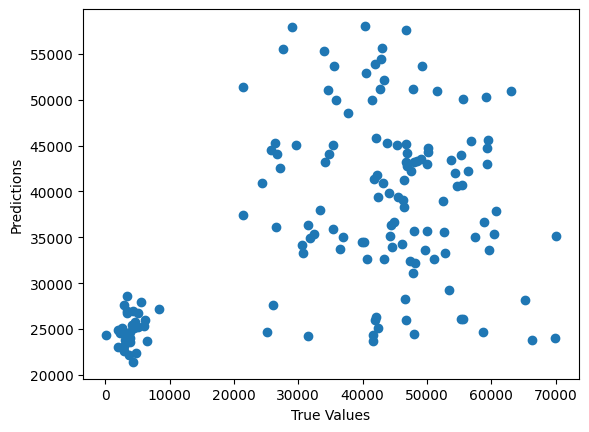

In [147]:
# PlOT regression
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


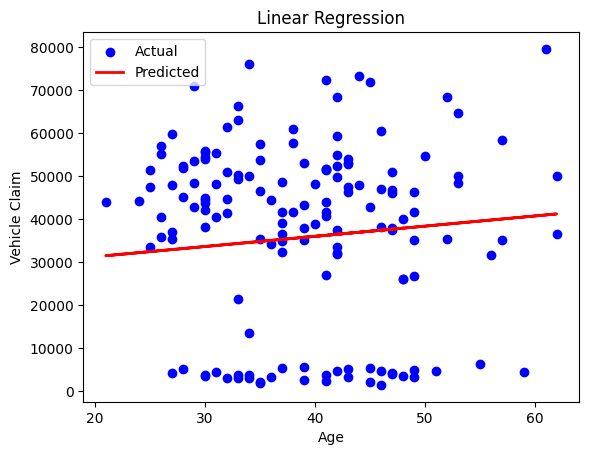

Mean Squared Error: 438923005.78091353


In [166]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
X = pd.read_csv('X_label.csv')
y = pd.read_csv('Y_label.csv')

# Use one feature for a 2D plot (e.g., 'age')
X_feature = X[['age']]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Plotting
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Vehicle Claim')
plt.legend()
plt.show()

print(f'Mean Squared Error: {mse}')

aik column dalo claim requested ( 1 se le ke 1.2 random variable multiple claim approved column)

ValueError: x and y must have same first dimension, but have shapes (602, 1) and (151, 1)

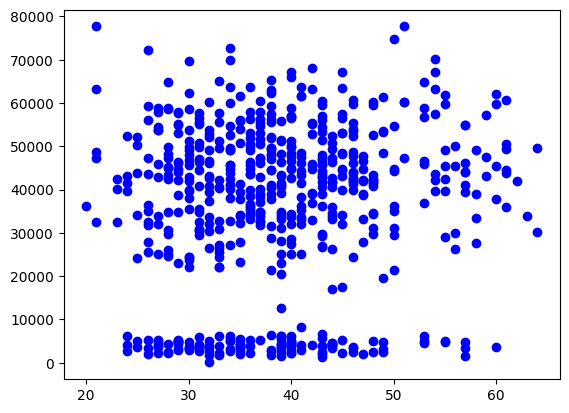

In [167]:
# Plotting
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Vehicle Claim')
plt.legend()
plt.show()

print(f'Mean Squared Error: {mse}')